<a href="https://colab.research.google.com/github/Anastasiya9323/machineLearning/blob/main/attempt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [104]:
import torchvision.datasets

In [105]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [106]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [107]:
len(y_train), len(y_test)

(60000, 10000)

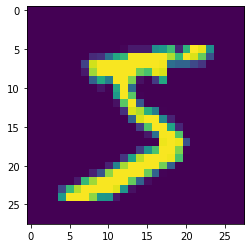

tensor(5)


In [108]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [109]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [110]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [111]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [112]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [113]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [114]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)
best_accuraccy=0

for epoch in range(400):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print((epoch+1),": ",accuracy)
    if accuracy  > best_accuraccy:
        best_accuraccy = accuracy 
print(best_accuraccy)

1 :  tensor(0.9806)
2 :  tensor(0.9885)
3 :  tensor(0.9875)
4 :  tensor(0.9888)
5 :  tensor(0.9881)
6 :  tensor(0.9884)
7 :  tensor(0.9896)
8 :  tensor(0.9905)
9 :  tensor(0.9908)
10 :  tensor(0.9885)
11 :  tensor(0.9899)
12 :  tensor(0.9889)
13 :  tensor(0.9900)
14 :  tensor(0.9894)
15 :  tensor(0.9896)
16 :  tensor(0.9885)
17 :  tensor(0.9891)
18 :  tensor(0.9896)
19 :  tensor(0.9908)
20 :  tensor(0.9902)
21 :  tensor(0.9879)
22 :  tensor(0.9892)
23 :  tensor(0.9884)
24 :  tensor(0.9865)
25 :  tensor(0.9866)
26 :  tensor(0.9876)
27 :  tensor(0.9905)
28 :  tensor(0.9900)
29 :  tensor(0.9904)
30 :  tensor(0.9900)
31 :  tensor(0.9899)
32 :  tensor(0.9895)
33 :  tensor(0.9871)
34 :  tensor(0.9906)
35 :  tensor(0.9884)
36 :  tensor(0.9907)
37 :  tensor(0.9872)
38 :  tensor(0.9902)
39 :  tensor(0.9882)
40 :  tensor(0.9906)
41 :  tensor(0.9889)
42 :  tensor(0.9896)
43 :  tensor(0.9883)
44 :  tensor(0.9884)
45 :  tensor(0.9898)
46 :  tensor(0.9917)
47 :  tensor(0.9896)
48 :  tensor(0.9886)
4

In [115]:
lenet5.forward(X_test)

tensor([[-552.2197, -306.2708, -206.9241,  ...,   59.1251, -466.9407,
         -222.8290],
        [-338.1212, -188.2038,   13.8311,  ..., -220.5775, -151.5241,
         -470.7543],
        [-365.8221,   52.3119, -181.6714,  ..., -172.2229, -237.3108,
         -356.4059],
        ...,
        [-381.5578, -185.6271, -284.4993,  ..., -236.7262,  -88.7559,
          -86.3322],
        [-162.6810, -353.3887, -397.8140,  ..., -208.1180, -131.5651,
         -104.2634],
        [-157.8106, -335.0319, -205.2257,  ..., -476.0980, -192.3577,
         -540.6695]], device='cuda:0', grad_fn=<AddmmBackward0>)

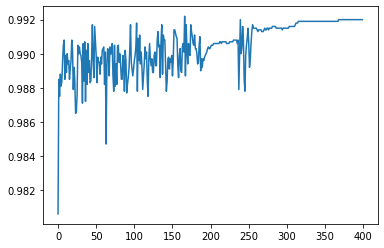

In [116]:
plt.plot(test_accuracy_history);

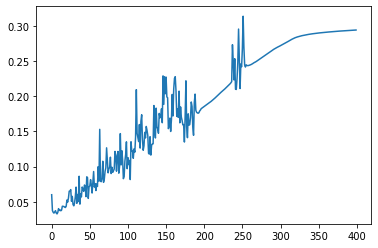

In [117]:
plt.plot(test_loss_history);